importing the dependencies


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

**data collection and proceesing **

In [72]:
#load the dataset to apandas dataframe
data=pd.read_csv("/content/Rainfall.csv")

In [73]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [74]:
data.shape

(366, 12)

In [75]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [76]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [77]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [78]:
print("day info:")
data.info()

day info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [79]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [80]:
#remove extra spaces in all clumns
data.columns=data.columns.str.strip()

In [81]:
data=data.drop(columns=["day"])

In [82]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [83]:
#checking the number of missing values
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [84]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [85]:
#handle missing values
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].median())

In [86]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [87]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [88]:
#converting thec yes and no to 1 and 0 respectively
data["rainfall"]=data["rainfall"].map({"yes":1,"no":0})

In [89]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


exploration data analysis(eda)

In [90]:
data.shape

(366, 11)

In [91]:
#setting plot style for all the plots
sns.set(style="whitegrid")

In [92]:
data.describe()


,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [93]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

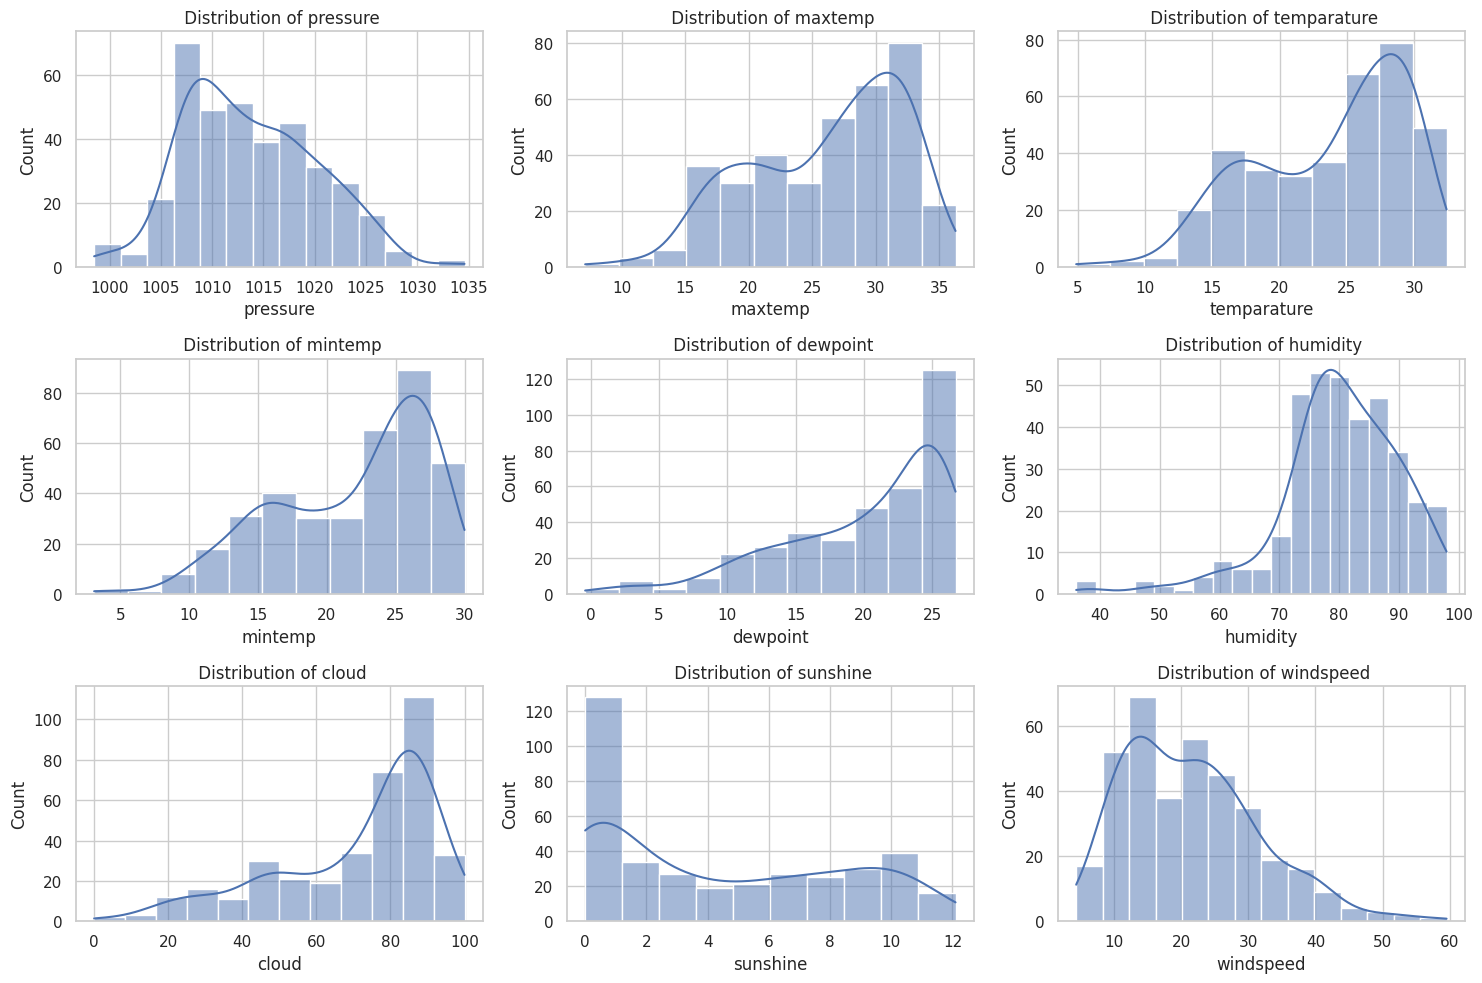

In [94]:
plt.figure(figsize=(15,10))
for i,column in enumerate (['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3 ,3 ,i)
  sns.histplot(data[column],kde=True)
  plt.title(f" Distribution of {column}")

plt.tight_layout()
plt.show()


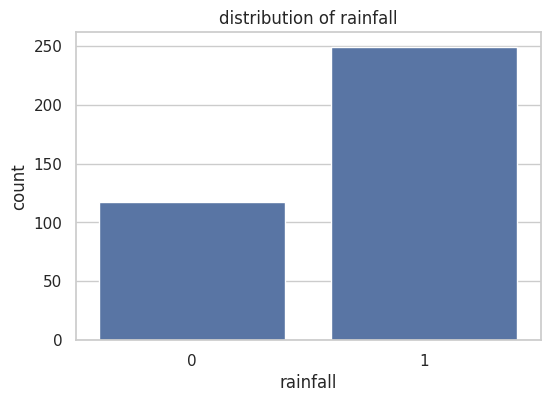

In [95]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data)
plt.title("distribution of rainfall")
plt.show()


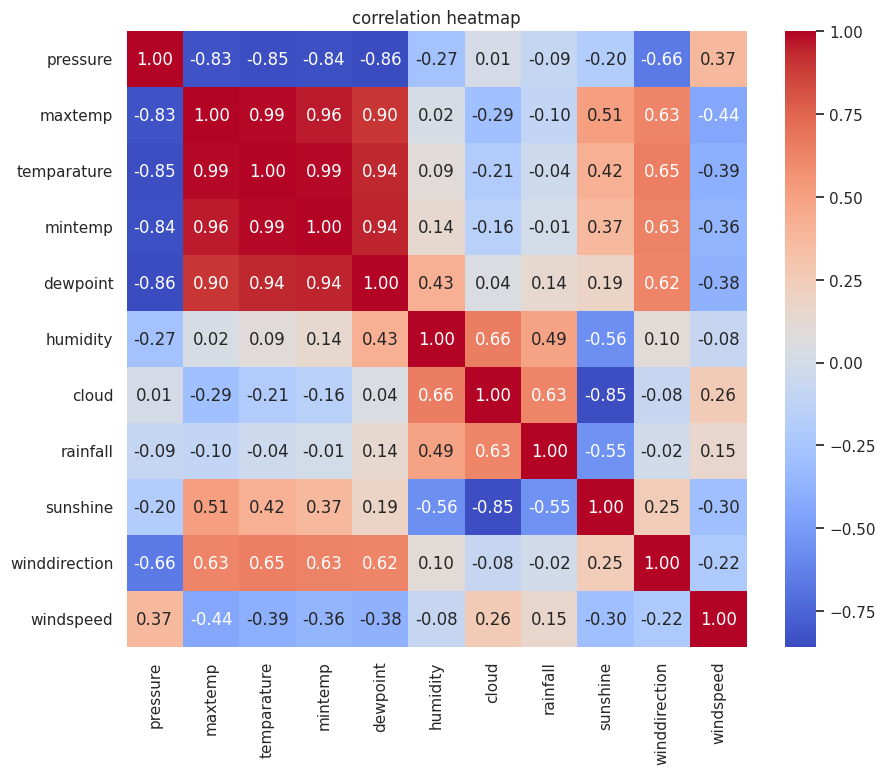

In [96]:
#correleation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()

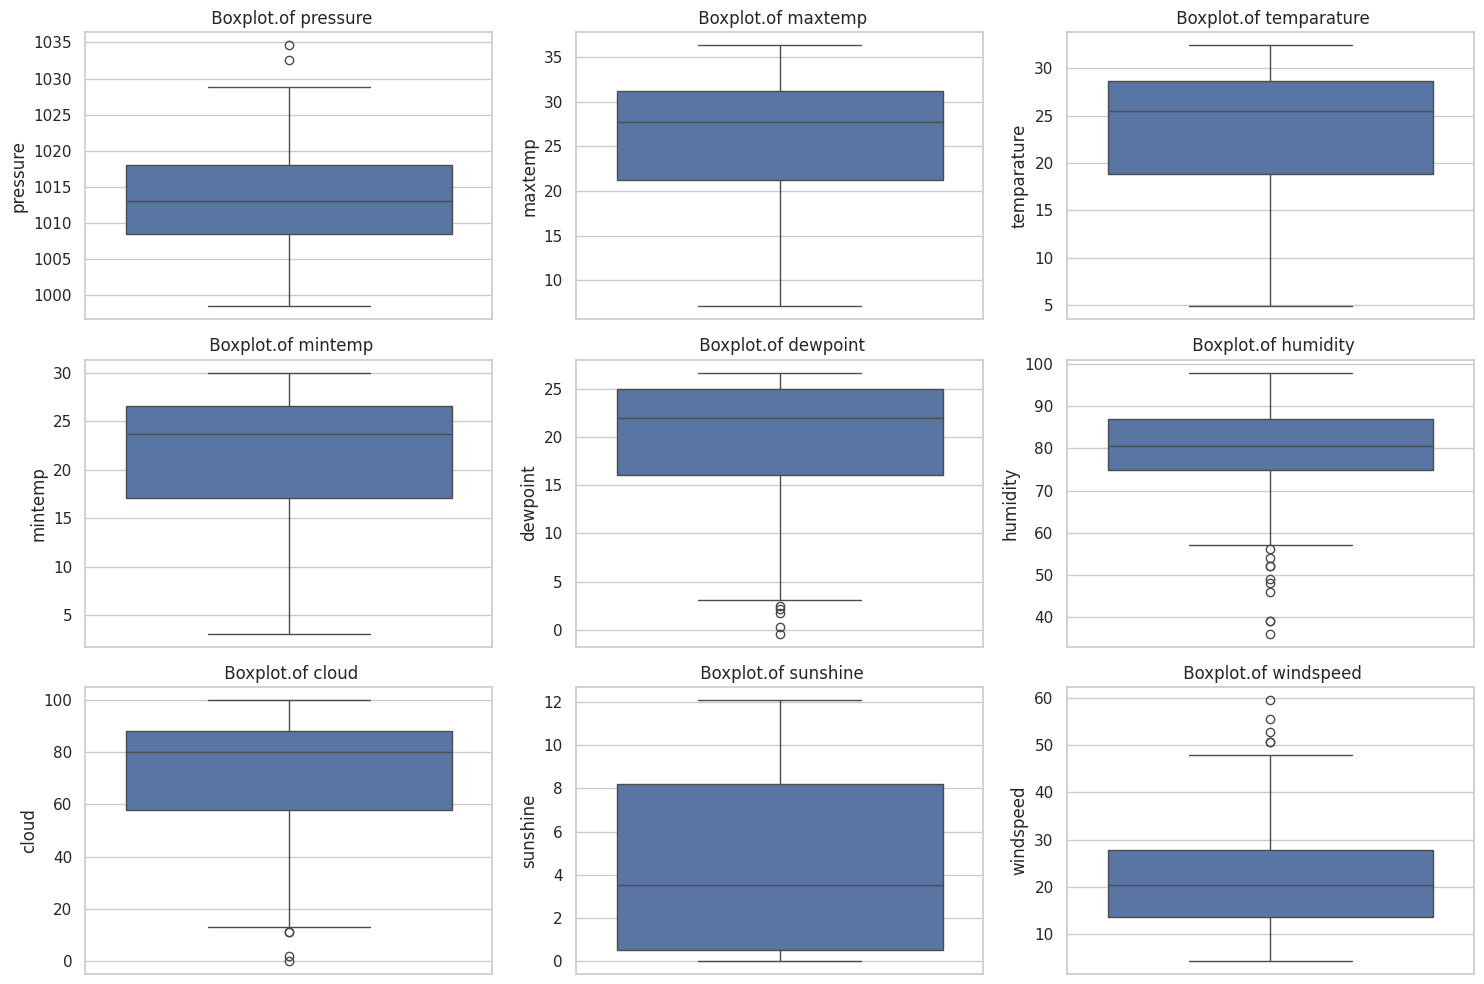

In [97]:
plt.figure(figsize=(15,10))
for i,column in enumerate (['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3 ,3 ,i)
  sns.boxplot(data[column])
  plt.title(f" Boxplot.of {column}")

plt.tight_layout()
plt.show()


data preproscessing

In [98]:
#drop highly corelatted column
data=data.drop(columns=['maxtemp','temparature','mintemp'])

In [99]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [100]:
print(data["rainfall"].value_counts()) #1 is majority calss and 0 is minority class

rainfall
1    249
0    117
Name: count, dtype: int64


In [101]:
#seperate majority and minorty class
df_majority=data[data["rainfall"]==1]
df_minority=data[data["rainfall"]==0]

In [102]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [103]:
#this is downsampt majority class to match the minorirty count
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)


In [104]:
df_majority_downsampled.shape

(117, 8)

In [105]:
df_downsampled=pd.concat([df_majority_downsampled,df_minority])


In [106]:
df_downsampled.shape

(234, 8)

In [107]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [108]:
#shuffle the final dataframe
df_downsampled=df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)


In [109]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [110]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [111]:
#split features andvtarget as X and Y

X=df_downsampled.drop(columns=["rainfall"])
y=df_downsampled["rainfall"]


In [112]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [113]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [114]:
#splitting the data into training data and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
rf_model=RandomForestClassifier(random_state=42)
param_grid_rf={
    "n_estimators":[50,100,200],
    "max_features":["sqrt","log2"],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}




model training

In [118]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [120]:
best_rf_model=grid_search_rf.best_estimator_
print("best parameters for random forest:",grid_search_rf.best_params_)


best parameters for random forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


model evaluation

In [121]:
cv_scores=cross_val_score(best_rf_model,X_train,y_train,cv=5)
print("cross-validation scores:",cv_scores)
print("mean cross validation score:",np.mean(cv_scores))

cross-validation scores: [0.68421053 0.81578947 0.83783784 0.83783784 0.91891892]
mean cross validation score: 0.818918918918919


In [123]:
#test set performane
y_pred=best_rf_model.predict(X_test)
print("Test set  accuracy:",accuracy_score(y_test,y_pred))
print("test set confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("test set classification report:\n",classification_report(y_test,y_pred))

Test set  accuracy: 0.7446808510638298
test set confusion matrix:
 [[17  7]
 [ 5 18]]
test set classification report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



prediction on unknown data

In [125]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [126]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)

input_df=pd.DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])

In [127]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [136]:
prediction=best_rf_model.predict(input_df)

In [137]:
print(prediction)

[1]


In [138]:
prediction[0]

1

In [139]:
prediction=best_rf_model.predict(input_df)
print("prediction result:","rainfall" if prediction [0]==1 else "no")

prediction result: rainfall


In [143]:
#save model and feature to a pickle
model_data={"model":best_rf_model,"features_names":X.columns.tolist()}
with open("rainfall_prediction_model.pkl","wb")as file:
  pickle.dump(model_data,file)

load the saved model and file and use it for prediction

In [144]:
import pickle
import pandas as pd



In [145]:
#load the trained model and features and names from the pickle file
with open("rainfall_prediction_model.pkl","rb") as file:
  model_data=pickle.load(file)

In [148]:
model=model_data["model"]
features_names=model_data["features_names"]

In [149]:
input_data=(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df=pd.DataFrame([input_data],columns=features_names)

In [151]:
prediction=best_rf_model.predict(input_df)
print("prediction result:","rainfall" if prediction[0]==1 else " no rainfall")


prediction result: rainfall


to try


1.Smote for class balancing

2. PCA for dimensionality reduction
3. simpler models like Logistic Regression(with feature scaling)
4. model selection with hyperparameter tuning

